In [45]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Задание 1

- Базово изучите датасет (достаточно методов info() и describe()).
- Выдвиньте пару гипотез, например, “Верно ли, что чем выше ВВП, тем выше и уровень счастья?” или “Есть ли взаимосвязь между уровнем доверия правительству и уровнем счастья?”. Постарайтесь подтвердить или опровергнуть их визуально и с помощью расчётов.
- Составьте корреляционную матрицу всех числовых признаков набора данных и визуализируйте её с помощью тепловой карты.

In [2]:
df1 = pd.read_csv('happines_corruption.csv')
df1

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.5370,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.000000,88
1,Denmark,7.5220,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.000000,91
2,Iceland,7.5040,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.000000,79
3,Switzerland,7.4940,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.000000,86
4,Finland,7.4690,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.000000,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,Botswana,3.4789,0.997549,0.000000,0.494102,0.509089,0.033407,0.101786,0.257241,Africa,2020,1.085695,60
788,Tanzania,3.4762,0.457163,0.000000,0.442678,0.509343,0.271541,0.203881,0.718963,Africa,2020,0.872675,38
789,Rwanda,3.3123,0.343243,0.000000,0.572383,0.604088,0.235705,0.485542,0.548445,Africa,2020,0.522876,54
790,Zimbabwe,3.2992,0.425564,0.000000,0.375038,0.377405,0.151349,0.080929,0.841031,Africa,2020,1.047835,24


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  social_support     792 non-null    float64
 12  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 80.6+ KB


In [6]:
df1.describe()

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,Year,social_support,cpi_score
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,5.473310,0.929217,0.504998,0.648691,0.427016,0.212440,0.125720,1.379277,2017.500000,0.609302,44.327020
std,1.124726,0.385774,0.552736,0.232261,0.148003,0.121660,0.109032,1.075276,1.708904,0.640754,19.508833
min,2.566900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000,11.000000
25%,4.590750,0.644242,0.000000,0.510070,0.325433,0.125784,0.052862,0.000000,2016.000000,0.000000,30.000000
50%,5.485500,0.994544,0.000000,0.685397,0.439621,0.197000,0.089000,1.731948,2017.500000,0.176214,38.000000
75%,6.300500,1.228677,1.040410,0.815641,0.546280,0.273250,0.154250,2.236894,2019.000000,1.268250,57.000000
max,7.808700,2.096000,1.610574,1.141000,0.724000,0.838075,0.551910,3.602140,2020.000000,1.644000,91.000000


## Гипотезы
1. Зависит ли счастье от здоровья?
2. Зависит ли счастье от щедрости?

Text(0.5, 0.98, 'Зависимость счастья от здоровья')

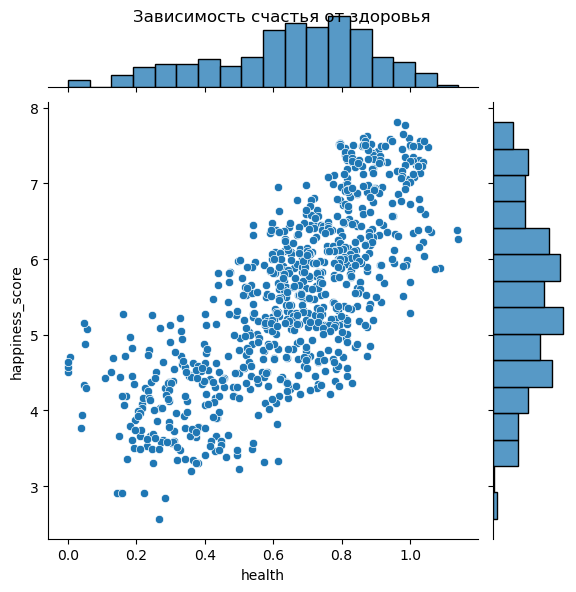

In [50]:
sns.jointplot(x='health', y ='happiness_score', data=df1).fig.suptitle('Зависимость счастья от здоровья')

In [23]:
df1[['happiness_score', 'health']].corr()

,happiness_score,health
happiness_score,1.000000,0.753534
health,0.753534,1.000000


Достаточно высокая корреляция между здоровьем и счастьем, что видно из графика

Text(0.5, 0.98, 'Зависимость счастья от щедрости')

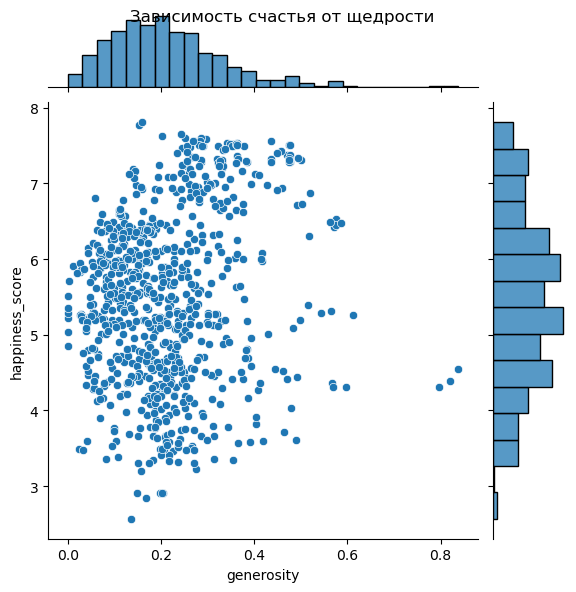

In [51]:
sns.jointplot(x='generosity', y ='happiness_score', data=df1).fig.suptitle('Зависимость счастья от щедрости')

In [26]:
df1[['happiness_score', 'generosity']].corr()

,happiness_score,generosity
happiness_score,1.000000,0.155419
generosity,0.155419,1.000000


Низкая корреляция. От щедрости счастье не зависит :()

[Text(0.5, 1.0, 'Тепловая карта корреляций')]

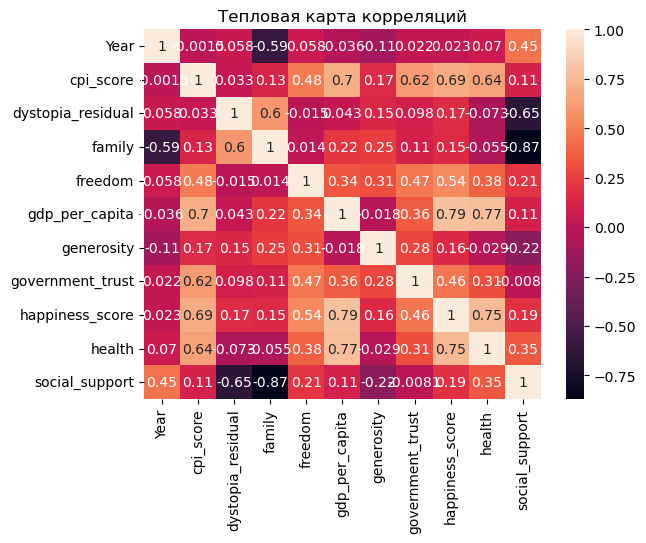

In [54]:
sns.heatmap(df1[df1.columns.difference(['Country', 'continent'])].corr(), annot=True).set(title='Тепловая карта корреляций')

# Задание 2
Продолжаем изучать цены на газ в Южной Корее. Файл с данными “gas_sales_data.csv” вы сможете найти в материалах занятия (для этого набора данных вы ранее рассчитывали коэффициенты корреляции в тренажере).

В этом задании нужно окончательно ответить на вопрос:
- Есть ли связь между среднемесячной температурой и потреблением газа в Южной Корее?

Для этого:

- Оставьте только два столбца:'Temperature' и 'Sum'.
- Постройте диаграмму рассеяния.
- Постройте модель линейной регрессии для выбранных признаков.
- Рассчитайте точность модели на тестовой выборке.
- Выведите график остатков.

In [29]:
df2 = pd.read_csv('gas_sales_data.csv')
df2

,Year,Month,Temperature,Gangwondo,Seoul,Gyeonggido,Incheon,Gyeongsangnamdo,Gyeongsangbukdo,Gwangju,...,Daejeon,Busan,Sejong,Ulsan,Jeollanamdo,Jeollabukdo,Jeju,Chungcheongnamdo,Chungcheongbukdo,Sum
0,2000,1,-1.20,16219,662424,363014,139454,42129,55362,39465,...,52992,85787,0,69241,22508,34507,0,20158,27838,1717175
1,2000,2,-0.99,16280,689177,375937,145834,42604,52863,40674,...,53950,87282,0,70910,22310,33784,0,23492,27175,1766341
2,2000,3,6.64,14105,566528,323145,121324,35990,47282,34610,...,41898,74476,0,63627,18033,29315,0,21156,22904,1490537
3,2000,4,12.11,10364,396231,237437,91421,28698,40393,25898,...,28618,58316,0,47106,15920,19783,0,17447,16818,1096964
4,2000,5,17.59,6843,262940,169495,67239,21073,35083,18426,...,17503,45915,0,43749,13808,14375,0,14508,12299,790248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2020,8,27.00,19076,163032,255222,70646,60523,84646,27561,...,31906,70508,5599,94251,49039,43885,1506,70181,49460,1142099
248,2020,9,21.40,18822,147556,243817,72542,65264,88652,28120,...,30307,70849,6069,101433,54253,48190,1179,86971,53589,1160655
249,2020,10,14.90,25946,213556,339823,78654,75071,103757,39428,...,42001,85283,10268,119332,60416,61328,1414,109095,61315,1471242
250,2020,11,9.00,35632,375289,497221,115663,101609,135432,58120,...,69624,122943,12087,147792,68793,82360,2161,142556,82499,2116835


In [31]:
df = df2[['Temperature', 'Sum']]
df

,Temperature,Sum
0,-1.20,1717175
1,-0.99,1766341
2,6.64,1490537
3,12.11,1096964
4,17.59,790248
...,...,...
247,27.00,1142099
248,21.40,1160655
249,14.90,1471242
250,9.00,2116835


Text(0.5, 0.98, 'Зависимость потребления от температуры')

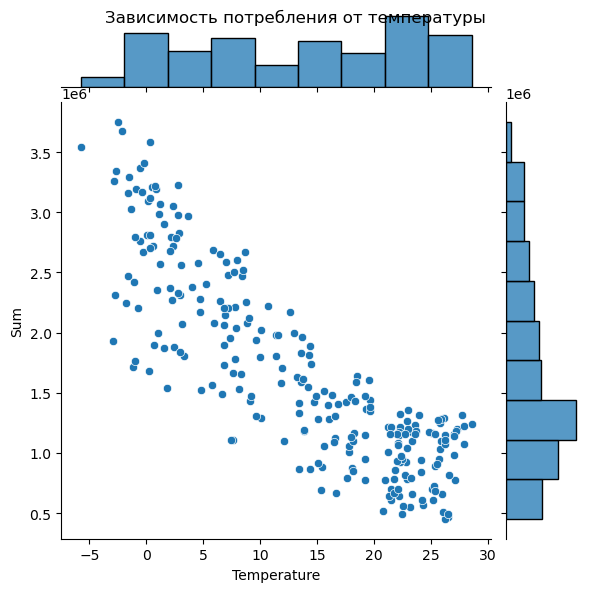

In [55]:
sns.jointplot(x='Temperature', y ='Sum', data=df).fig.suptitle('Зависимость потребления от температуры')

In [34]:
lr2 = LinearRegression()
X = df[['Temperature']]
y = df['Sum']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [38]:
lr2.fit(X_train, y_train)

LinearRegression()

In [39]:
# Коэффициент и свободный член
lr2.coef_, lr2.intercept_

(array([-68852.20607572]), 2564219.348713658)

In [40]:
# R2
lr2.score(X_test, y_test)

0.7966226666154733

In [41]:
predict = lr2.predict(X_test)

[Text(0.5, 1.0, 'Распределение остатков')]

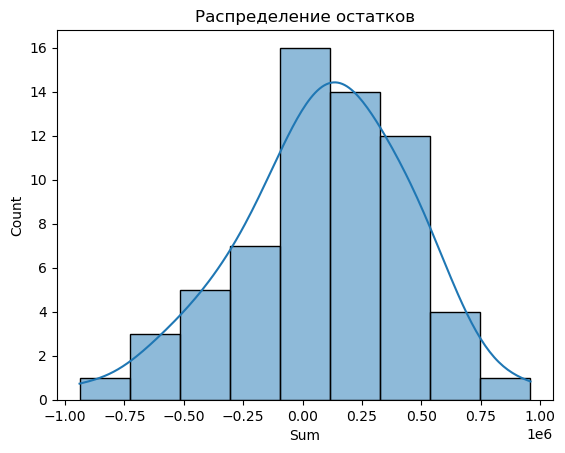

In [56]:
sns.histplot((y_test-predict), kde=True).set(title='Распределение остатков')